In [7]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K

In [9]:
df = pd.concat([X, y], axis=1)
df.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [12]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


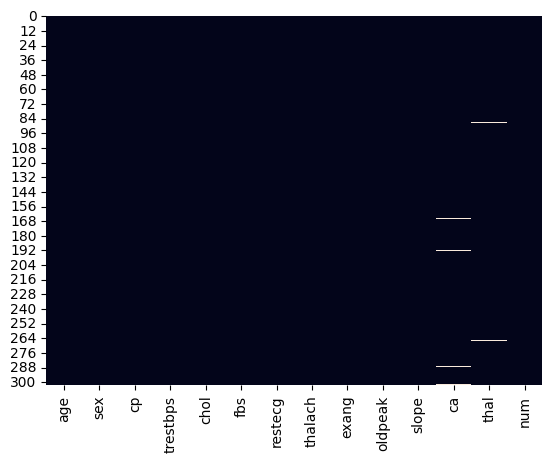

In [13]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [14]:
mean = df['ca'].median()
print(mean)

0.0


In [15]:
median = df['ca'].median()
df['ca'].fillna(median, inplace=True)
mode_category = df['thal'].mode()[0]
df['thal'].fillna(mode_category, inplace=True)

In [16]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


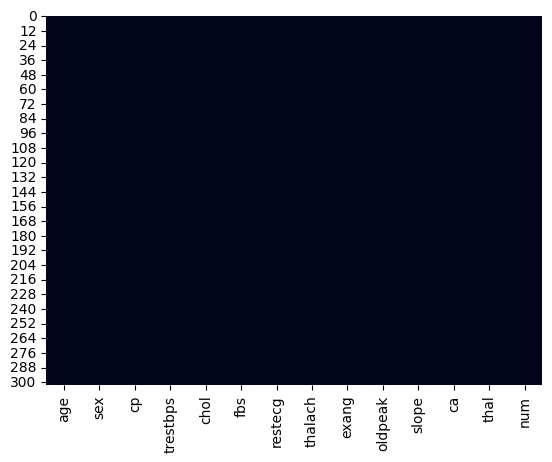

In [17]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [18]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?


In [19]:
#is data balanced in terms of count of each class?
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

<Axes: xlabel='num'>

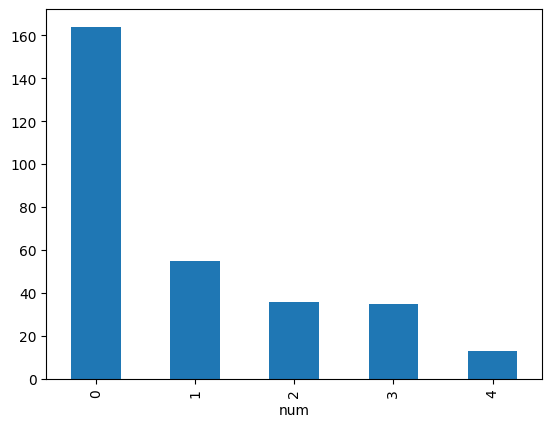

In [20]:
df['num'].value_counts().plot.bar()

abscene:  164
some_hearth_disease:  139


<BarContainer object of 2 artists>

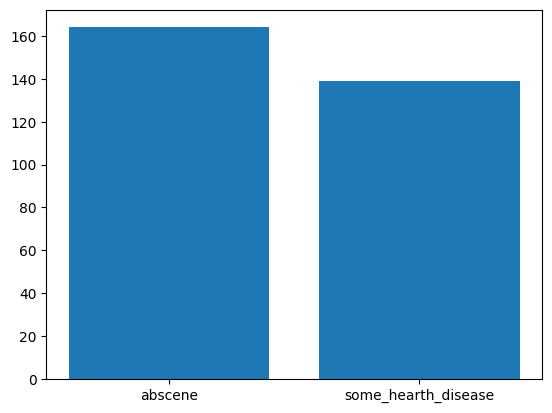

In [21]:

abscene = df['num'].value_counts()[0]
some_hearth_disease = df['num'].value_counts()[1:].sum()
print('abscene: ', abscene)
print('some_hearth_disease: ', some_hearth_disease)
plt.bar(['abscene', 'some_hearth_disease'], [abscene, some_hearth_disease])

Jakie są średnie i odchylenia cech liczbowych?


In [22]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df[numeric_features].describe().loc[['mean', 'std']]


,age,trestbps,chol,thalach,oldpeak,ca
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.663366
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.934375


In [23]:
# show only mean and std


Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ca'}>]], dtype=object)

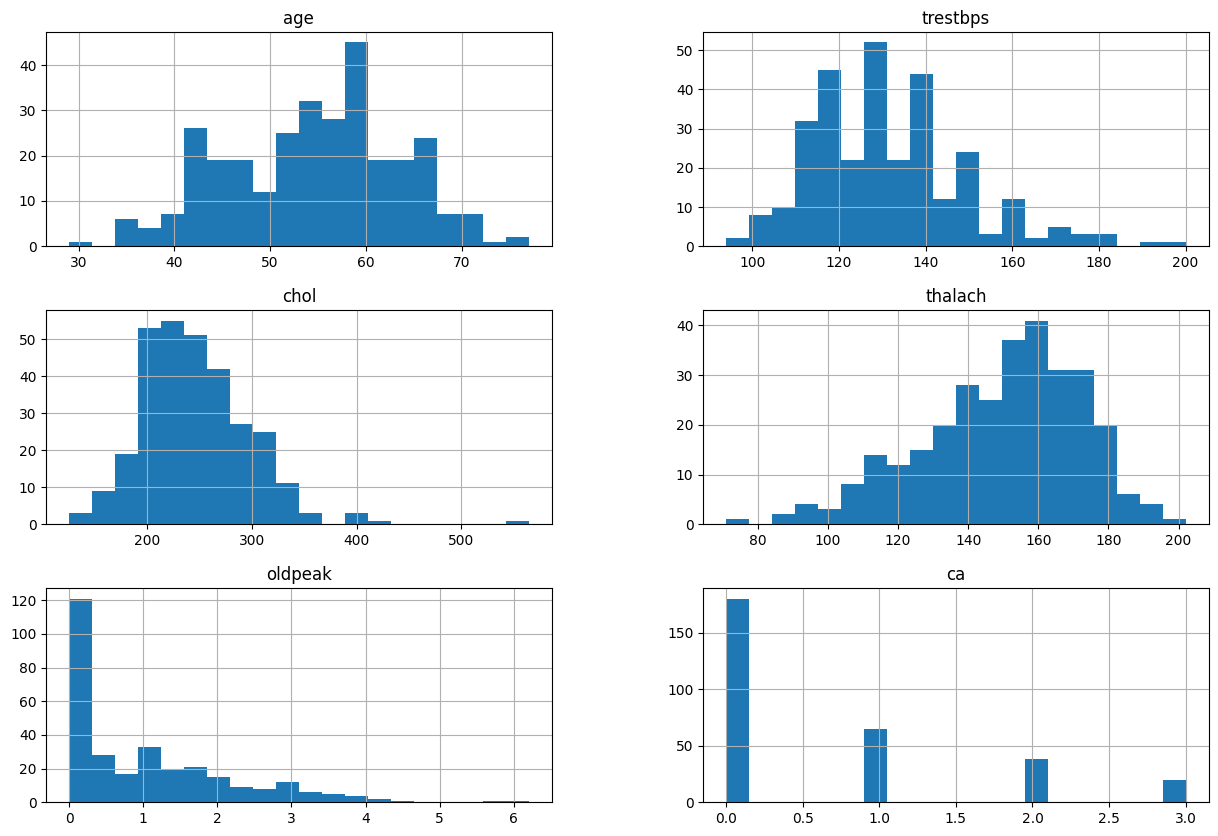

In [82]:
# is numeric features normal distribution?
df[numeric_features].hist(bins=20, figsize=(15, 10))

Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'thal'}>],
       [<Axes: title={'center': 'slope'}>, <Axes: >, <Axes: >]],
      dtype=object)

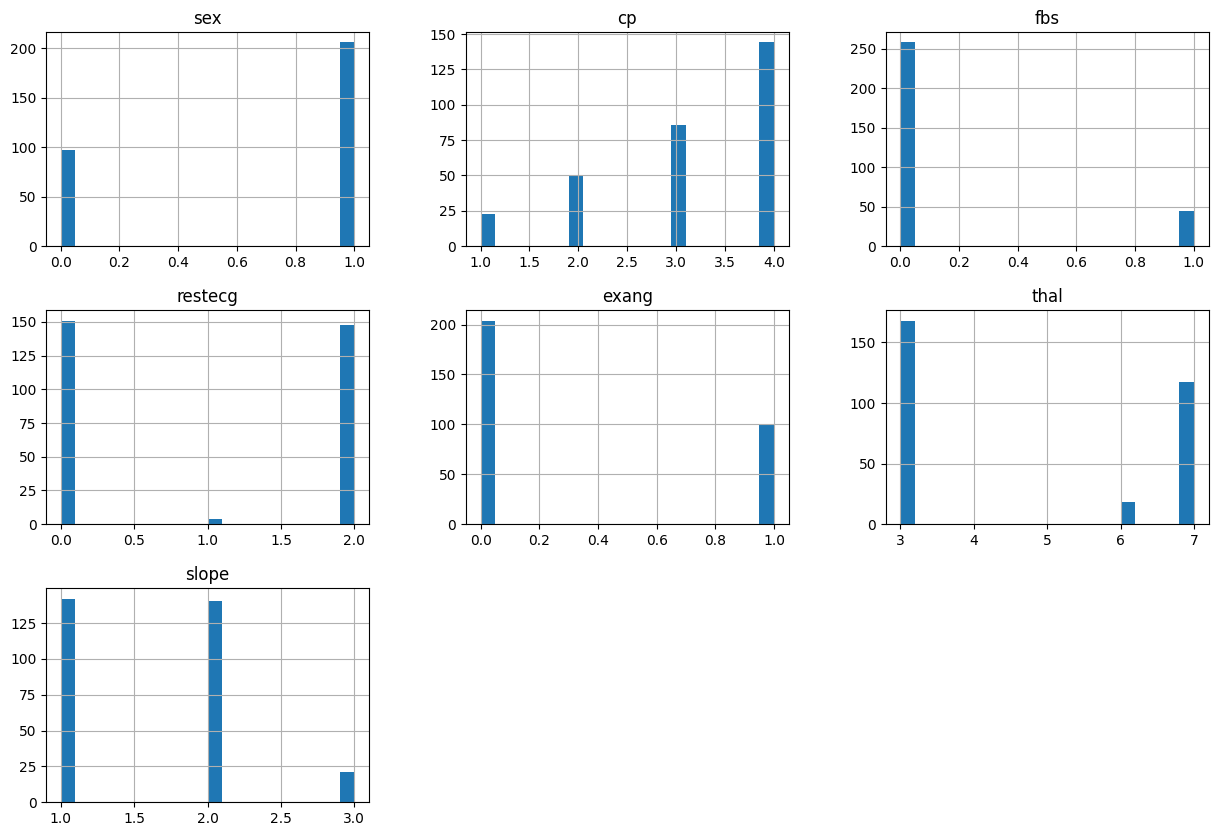

In [25]:
categories_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'slope']
df[categories_features].hist(bins=20, figsize=(15, 10))

Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je
zastąpić?

Uzupełnianie brakujących danych średnią/medianą: Możesz uzupełnić brakujące dane cech wartościami średnimi lub medianą z danej kolumny. Jest to przydatne, gdy dane są rozkładem normalnym lub nie zawierają wartości odstających.




kod 
przekształcający dane do macierzy cech liczbowych (przykłady × cechy)

In [26]:
def one_hot_encode(df, column, column_names):
    dummies = pd.get_dummies(df[column], prefix=column)
    column_names = [column + '_' + str(name) for name in column_names]
    dummies.columns = column_names
    dummies = dummies.astype('int64')
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

Przekształcenie: cechy kategoryczne do cech liczbowych

In [27]:
df =  one_hot_encode(df, 'cp', ['typical_angina', 'atypical_angina', 'non-anginal_pain', 'asymptomatic'])
df = one_hot_encode(df, 'thal', ['normal', 'ST-T_wave_abnormality', 'left_ventricular_hypertrophy'])
df = one_hot_encode(df, 'slope', ['upsloping', 'flat', 'downsloping'])
df = one_hot_encode(df, 'restecg', ['normal', 'fixed_defect', 'reversable_defect'])


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                303 non-null    int64  
 1   sex                                303 non-null    int64  
 2   trestbps                           303 non-null    int64  
 3   chol                               303 non-null    int64  
 4   fbs                                303 non-null    int64  
 5   thalach                            303 non-null    int64  
 6   exang                              303 non-null    int64  
 7   oldpeak                            303 non-null    float64
 8   ca                                 303 non-null    float64
 9   num                                303 non-null    int64  
 10  cp_typical_angina                  303 non-null    int64  
 11  cp_atypical_angina                 303 non-null    int64  

In [29]:
df.head(20)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,...,cp_asymptomatic,thal_normal,thal_ST-T_wave_abnormality,thal_left_ventricular_hypertrophy,slope_upsloping,slope_flat,slope_downsloping,restecg_normal,restecg_fixed_defect,restecg_reversable_defect
0,63,1,145,233,1,150,0,2.3,0.0,0,...,0,0,1,0,0,0,1,0,0,1
1,67,1,160,286,0,108,1,1.5,3.0,2,...,1,1,0,0,0,1,0,0,0,1
2,67,1,120,229,0,129,1,2.6,2.0,1,...,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1.4,0.0,0,...,0,1,0,0,1,0,0,0,0,1
5,56,1,120,236,0,178,0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0
6,62,0,140,268,0,160,0,3.6,2.0,3,...,1,1,0,0,0,0,1,0,0,1
7,57,0,120,354,0,163,1,0.6,0.0,0,...,1,1,0,0,1,0,0,1,0,0
8,63,1,130,254,0,147,0,1.4,1.0,2,...,1,0,0,1,0,1,0,0,0,1
9,53,1,140,203,1,155,1,3.1,0.0,1,...,1,0,0,1,0,0,1,0,0,1


# Cwiczenie 2


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop('num', axis=1)
y = df['num']

In [68]:
# use standard scaler to scale numeric features
scaler = preprocessing.StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])


## Zamaiana klas na binarne


In [69]:
y = y.replace([1, 2, 3, 4], 1)

In [70]:
y.value_counts()

num
0    164
1    139
Name: count, dtype: int64

In [71]:
from numpy import shape, e

X = X.values
y = y.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                303 non-null    float64
 1   sex                                303 non-null    int64  
 2   trestbps                           303 non-null    float64
 3   chol                               303 non-null    float64
 4   fbs                                303 non-null    int64  
 5   thalach                            303 non-null    float64
 6   exang                              303 non-null    int64  
 7   oldpeak                            303 non-null    float64
 8   ca                                 303 non-null    float64
 9   cp_typical_angina                  303 non-null    int64  
 10  cp_atypical_angina                 303 non-null    int64  
 11  cp_non-anginal_pain                303 non-null    int64  

In [89]:
import numpy as np

def sigmoid(n):
    return 1 / (1 + np.exp(-n))

def loss(y, y_pred):
    return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

class MiniBatchLogisticRegression:

    def __init__(self, lr=0.001, epochs=1000, batch_size=5, seed=42):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.batch_size = batch_size
        self.seed = seed



    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.ones(n_features)
        self.bias = 0

        # Jeśli batch_size jest większy niż liczba próbek, to ustawiamy go na liczbę próbek -> zwyczajnie uczymy na całym zbiorze GD
        if self.batch_size > n_samples:
            self.batch_size = n_samples

        #inicjacja list na koszt i epoki
        cost_list = []
        epoch_list = []

        #liczba paczek
        n_batches = int(n_samples / self.batch_size)
        #dla każdej iteracji
        np.random.seed(self.seed)
        for i in range(self.epochs):
            #tasowanie indeksów ale deterministycznie bo ustawiliśmy seed
            random_order = np.random.permutation(n_samples)
            #tasowanie zbioru
            X_shuffled = X[random_order]
            y_shuffled = y[random_order]

            #dla każdej paczki
            for j in range(0, n_samples, self.batch_size):

                X_batch = X_shuffled[j:j + self.batch_size]
                y_batch = y_shuffled[j:j + self.batch_size]

                predictions = np.array([sigmoid(np.dot(X_batch, self.weights) + self.bias)]).T

                dw = (1/self.batch_size) * np.dot((predictions - y_batch).T, X_batch)[0]
                db = (1/self.batch_size) * np.sum(predictions - y_batch)

                self.weights = self.weights - self.lr * dw
                self.bias = self.bias - self.lr * db

                cost = np.mean(loss(y_batch, predictions))
            cost_list.append(cost)
            epoch_list.append(i)
        

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

*Weryfikacja powinna uwzględnić podział na dane uczące i testowe


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [91]:
clf = MiniBatchLogisticRegression(lr=0.001, epochs=1000, batch_size=5, seed=1)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Uczenie się modelu powinno być weryfikowalne metryką (np. accuracy, fscoreprecision – można korzystać z bibliotek)




In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

Accuracy:  0.7105263157894737
Precision:  0.8571428571428571
Recall:  0.4864864864864865
F1:  0.6206896551724138
